In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

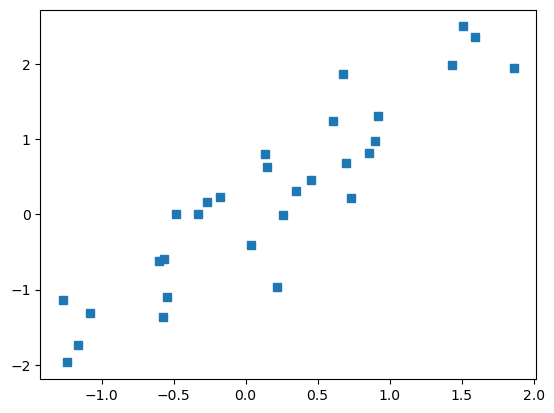

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x = torch.randn(30,1)
y = x + torch.randn(30,1)/2

plt.plot(x,y,"s")
plt.show()

In [4]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
learning_rate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learning_rate)

In [6]:
trainingEpochs = 500
losses = torch.zeros(trainingEpochs)

for epoch in range(trainingEpochs):

    yhat = ANNreg(x)
    loss = lossfun(yhat,y)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



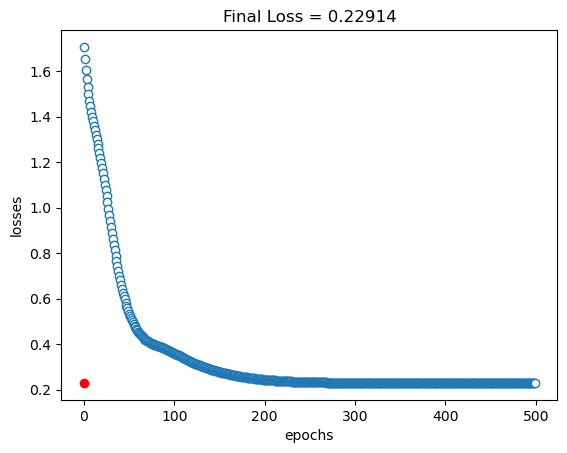

In [16]:
predictions = ANNreg(x)

testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(),"o",markerfacecolor="w",linewidth=.1)
plt.plot(testloss.detach(),"ro")
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("Final Loss = %g" %testloss.item())
plt.show()

In [13]:
testloss.item()

0.2291400283575058

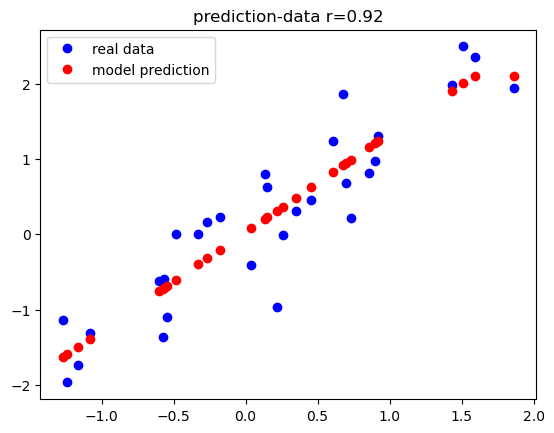

In [22]:
#measuring how the model's prediction fit to the real data
plt.plot(x,y,"bo", label="real data")
plt.plot(x,predictions.detach(),"ro",label="model prediction")
plt.title(f"prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}"),
plt.legend()
plt.show()

In [54]:
def datagen(N,noise):
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/noise

    return x, y


def modelselect(lr,epoch):


    ANNreg = nn.Sequential(
        nn.Linear(1,2),
        nn.ReLU(),
        nn.Linear(2,5),
        nn.ReLU(),
        nn.Linear(5,1)
    )

    lossfun = nn.MSELoss()

    optimizer = torch.optim.Adam(ANNreg.parameters(),lr=lr)

    losses = torch.zeros(epoch)

    for i in range(epoch):
        yHat = ANNreg(x)
        loss = lossfun(yHat,y)
        losses[i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ANNreg(x)

    testloss = (predictions - y).pow(2).mean()

    if testloss.item() > .20:
        return 1
    else:
        return 0


In [52]:
x,y = datagen(50,4)

In [55]:
model_count = 0
for n in range(100):
    model_count += modelselect(.01,200)

print(model_count)
    

3


In [60]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

print(a[0].shape)
print(b[0].shape)

(100,)
(100,)


In [62]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

print(type(labels))
print(np.shape(labels))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])
<class 'torch.Tensor'>
torch.Size([200, 1])


In [63]:
data_np.T.shape

(2, 200)

In [68]:
def ANNclassifier():

    ANNmodel = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
    )
    lossfun = nn.BCELoss()
    optimizer = torch.optim.SGD(ANNmodel.parameters(),lr=.01)
    return ANNmodel,lossfun,optimizer


In [69]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  
  ANNmodel,lossfun,optimizer = ANNclassifier()

  # forward pass
  yHat = ANNmodel(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



In [71]:
predictions = ANNmodel(data)

predlabels = predictions>.5

# total accuracy
totalacc = 100*torch.mean((predlabels == labels).float())

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc1 = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

print('Alternative Final accuracy: %g%%' %totalacc1)

Final accuracy: 50%
Alternative Final accuracy: 50%
